In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_x = np.array(pd.read_csv("cancer_data.csv"))
train_y = np.array(pd.read_csv("cancer_data_y.csv"))
X_test = np.array(pd.read_csv("test_cancer_data.csv"))
X_test = X_test.T
Y_test = np.array(pd.read_csv("test_cancer_data_y.csv"))
Y_test = Y_test.T

In [3]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [4]:
def initialize(dim):
    w = np.zeros(shape=(dim, 1))
    b = 0
    return w, b

In [5]:
def propagate(w, b, X, Y):
    m = X.shape[1]  # getting no of rows

    # Forward Prop
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))

    # backwar prop
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)

    cost = np.squeeze(cost)
    grads = {"dw": dw,
             "db": db}
    return grads, cost

In [6]:
def optimize(w, b, X, Y, num_iters, alpha, print_cost=False):
    costs = []
    for i in range(num_iters):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - alpha * dw
        b = b - alpha * db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 10000 training examples
        if print_cost and i % 10000 == 0:
            print("Cost after iteration %i: %f" % (i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [7]:
def predict(w, b, X):
    m = X.shape[1]
    y_pred = np.zeros(shape=(1, m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T, X) + b)

    for i in range(A.shape[1]):
        y_pred[0, i] = 1 if A[0, i] > 0.5 else 0

    assert (y_pred.shape == (1, m))
    return y_pred

In [8]:
def model(X_train, Y_train, num_iters=2000, alpha=0.5, print_cost=False):

    w, b = initialize(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iters, alpha, print_cost)

    w = parameters["w"]
    b = parameters["b"]

    y_prediction_train = predict(w, b, X_train)
    y_prediction_test = predict(w, b, X_test)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - Y_train)) * 100))
    print("\ntest accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - Y_test)) * 100))

    predList = y_prediction_test.tolist()
    tlist = Y_test.tolist()

    array_length = len(predList[0])
    d = {"costs": costs,
         "Y_prediction_test": y_prediction_test,
         "Y_prediction_train": y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": alpha,
         "num_iterations": num_iters}

    # Plot learning curve (with costs)
    costs = np.squeeze(d['costs'])
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(d["learning_rate"]))
    plt.show()

Cost after iteration 0: 0.693147
Cost after iteration 10000: 0.510351
Cost after iteration 20000: 0.447257
Cost after iteration 30000: 0.408717
Cost after iteration 40000: 0.381439
Cost after iteration 50000: 0.360632
Cost after iteration 60000: 0.344059
Cost after iteration 70000: 0.330495
Cost after iteration 80000: 0.319183
Cost after iteration 90000: 0.309611
Cost after iteration 100000: 0.301411
Cost after iteration 110000: 0.294307
Cost after iteration 120000: 0.288092
Cost after iteration 130000: 0.282605
Cost after iteration 140000: 0.277721
Cost after iteration 150000: 0.273342
Cost after iteration 160000: 0.269389
Cost after iteration 170000: 0.265801
Cost after iteration 180000: 0.262525
Cost after iteration 190000: 0.259521
train accuracy: 91.62679425837321 %

test accuracy: 91.94630872483222 %


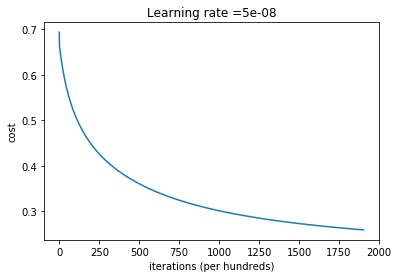

In [9]:
model(train_x.T, train_y.T, num_iters=190500, alpha=5e-8, print_cost=True)